# Logistisk regressionsanalys
*av Anders Sundell*

Regressionsanalys handlar enkelt uttryckt om att passa en linje till en mängd punkter. Ett antagande är då att den beroende variabeln är en skala, med många olika värden, med jämnt avstånd dem emellan.

Men hur fungerar det om den beroende variabeln bara kan ha värdet 0 eller 1? Till exempel om en person röstat på ett visst parti (1) eller inte (0). Vi kan då få en del konstiga resultat, som att vi gissar att en person ska ha röstat 1,2 på partiet, eller -0,3.

En speciell form av regressionsanalys kan då vara behjälplig: **logistisk regressionsanalys.** Den är anpassad för beroende variabler som bara har värdet 0 och 1. Funktionen som används beräknar då för varje observation en sannolikhet att ha värdet 1, och den sannolikheten är aldrig mindre än 0 eller mer än 1. Metoden används ofta för att klassificera observationer som antingen nollor eller ettor.

Analyserna går inte att "lösa" på samma sätt som en vanlig regressionsanalys, där det finns en optimal lösning. Istället används en process där datorn letar sig fram till ett svar, med hjälp av den så kallade maximum likelihood-metoden. Rent konkret blir dock de slutsatser man drar med metoden ofta de samma som om man använder sig av en vanlig OLS-regressionsanalys.

**Nedan går vi igenom hur man gör en logistisk regressionsanalys, hur man tolkar resultaten, och gör en jämförelse med "vanlig" OLS-regression.**

I det här exemplet kommer att använda oss av data från den amerikanska <a href="http://gss.norc.org/get-the-data/stata">General Social Survey</a>, som är en enkätundersökning med vanliga medborgare, med frågor om allt möjligt. Vi kommer använda versionen från 2018. Ladda ned den för att följa med i exemplet.

In [3]:
use "/Users/anderssundell/Dropbox/Jupyter/stathelp/data/GSS2018.dta", clear

## Frågeställning och variabler

Vi ska undersöka om hur de svarandes ideologi hänger samman med sannolikheten att rösta på Donald Trump i presidentvalet 2016. Information om det finns i variabeln "pres16". Vi börjar med att koda om variabeln med `recode` så att det bara är de som faktiskt röstade i valet som är med i variabeln. De som röstade för Trump får värdet 1, alla andra värdet 0. Vi sparar informationen i en ny variabel som heter "dum_trump". Därefter tar vi ut en frekvenstabell med `tab`.

In [7]:
recode pres16 (0 4 8 9 = .) (2 = 1) (1 3 = 0), generate(dum_trump)
tab dum_trump



(2348 differences between pres16 and dum_trump)


  RECODE of |
     pres16 |
      (vote |
 clinton or |
     trump) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        851       59.59       59.59
          1 |        577       40.41      100.00
------------+-----------------------------------
      Total |      1,428      100.00


40 procent av de svarande säger att de röstade på Trump i valet. Nu ska vi se hur det hänger ihop med ideologi. Ideologivariabeln heter "polviews", och går från vänster (extremely liberal) till höger (extremely conservative).

In [8]:
tab polviews


    think of self as |
          liberal or |
        conservative |      Freq.     Percent        Cum.
---------------------+-----------------------------------
   extremely liberal |        122        5.43        5.43
             liberal |        278       12.37       17.80
    slightly liberal |        256       11.39       29.19
            moderate |        855       38.05       67.25
slghtly conservative |        283       12.59       79.84
        conservative |        354       15.75       95.59
extrmly conservative |         99        4.41      100.00
---------------------+-----------------------------------
               Total |      2,247      100.00


## Genomföra analysen och tolka resultaten

Nu har vi allt vi behöver för att göra analysen. Kommandot är enkelt: `logit beroende oberoende`. Vi gör det nedan:

In [9]:
logit dum_trump polviews


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -680.37554  
Iteration 2:   log likelihood = -675.51403  
Iteration 3:   log likelihood = -675.49916  
Iteration 4:   log likelihood = -675.49916  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(1)        =     532.23
                                                Prob > chi2       =     0.0000
Log likelihood = -675.49916                     Pseudo R2         =     0.2826

------------------------------------------------------------------------------
   dum_trump |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   1.040075   .0579601    17.94   0.000     .9264753    1.153675
       _cons |  -4.836872   .2639061   -18.33   0.000    -5.354119   -4.319626
-------------------------------------------------------------

Det första vi ser är en rapport över hur modellen arbetat sig fram till den bästa lösningen. Vanligtvis behöver man inte bry sig om det, men om man har en väldigt komplex modell kan det hända att den inte "konvergerar", alltså hittar en bra lösning. Då kan den behöva förenklas.

Därefter följer en tabell som ser rätt lik ut den man får ut från en OLS regressionsanalys. I raderna står de oberoende variablerna angivna, och sedan får vi ut koefficient, standardfel, z-värde (istället för t-värde), signifikansvärde (kolumnen P>|Z|) och konfidensintervall för koefficienten.

Koefficienten visar att ju mer polviews ökar (dvs respondenten står längre till höger), desto mer ökar sannolikheten att man röstar på Trump, vilket är rimligt. Hade koefficienten haft ett minustecken framför sig hade det varit tvärtom. Vi ser också att koefficienten är statistiskt signifikant (eftersom p-värdet är mindre än 0,050).

Till höger ovanför tabellen ser vi också måttet "Pseudo R2". Det är konstruerat för att efterlikna R2 i en vanlig regression, och går mellan 0 och 1. Här ser vi att det är 0,2826, vilket innebär att 28 procent av variationen i röstandet för Trump kan förklaras av vilken ideologi de svarande har.

## Log-odds och odds
Men exakt hur mycket ökar sannolikheten? Det är väldigt svårt att utläsa från de här koefficienterna. Det som visas är hur mycket det så kallade log-oddset ökar när polviews ökar med ett steg. Ochad är log-oddset? För att svara på det behöver vi först ta reda på vad oddset är. Oddset är sannolikheten för att respondenten ska rösta på Trump, delat på 1 minus samma sammolikhet:
$odds = \frac{p}{(1-p)}$

Log-oddset är den naturliga logaritmen av det oddset:
$logodds = ln\left( \frac{p}{(1-p)} \right)$

Så när polviews ökar med ett steg är det alltså det som ökar. Inte särskilt intuitivt, förutom att det är lätt att se om effekten är positiv eller negativ.

Anledningen till att koefficienterna inte visar till exempel hur många procent mer sannolikt det är att man skulle rösta på Trump om man blir mer höger är för att det skulle göra sambandet linjärt, som i en vanlig regression. Då skulle vi kunna få konsekvenser som att det blir mer än 100% sannolikhet, till exempel. Vi återkomma till det senare.

## Oddsförhållanden - odds-ration

Ett annat sätt att visa koefficienterna är som odds-ration, odds-förhållanden. De visar då hur en ökning av den oberoende variabeln skulle påverka oddset, som ett förhållande. Om det står 2 innebär det att en ökning av den oberoende variabeln med ett steg skulle göra oddset dubbelt så stort. Om det står 0,5 innebär det att en ökning av den oberoende variabeln med ett steg skulle göra oddset hälften så stort. Här går alltså gränsen mellan positiva och negativa samband vid 1, inte vid 0, som med "vanliga" koefficienter.

Vi får fram oddsförhållanden genom att göra om analysen och lägga till ett option `or`:

In [10]:
logit dum_trump polviews, or


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -680.37554  
Iteration 2:   log likelihood = -675.51403  
Iteration 3:   log likelihood = -675.49916  
Iteration 4:   log likelihood = -675.49916  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(1)        =     532.23
                                                Prob > chi2       =     0.0000
Log likelihood = -675.49916                     Pseudo R2         =     0.2826

------------------------------------------------------------------------------
   dum_trump | Odds Ratio   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   2.829429   .1639939    17.94   0.000     2.525592    3.169819
       _cons |   .0079318   .0020933   -18.33   0.000     .0047286    .0133049
-------------------------------------------------------------

Odds-ratiot för polviews är alltså 2,8. Oddset för att rösta på Trump blir nästan tre gånger så stort för varje steg åt höger man tar på ideologiskalan.

## Predicera sannolikheter

Det absolut mest intutiva är dock att räkna ut förväntade sannolikheter för att man ska rösta på Trump, givet olika värden på de oberoende variablerna.

Det kan vi till exempel göra med kommandot `margins`. Vi kör då först en analys (spelar ingen roll om vi valde att presentera logoddskoefficienter eller odds-ration), och sedan direkt efter `margins`. Vi använder också option `at()` för att ange över vilka värden vi vill få den förväntade sannolikheten för en Trump-röst.

In [11]:
margins, at(polviews=(1/7))


Adjusted predictions                            Number of obs     =      1,395
Model VCE    : OIM

Expression   : Pr(dum_trump), predict()

1._at        : polviews        =           1

2._at        : polviews        =           2

3._at        : polviews        =           3

4._at        : polviews        =           4

5._at        : polviews        =           5

6._at        : polviews        =           6

7._at        : polviews        =           7

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |   .0219499   .0044733     4.91   0.000     .0131824    .0307175
          2  |   .0597081   .0086812     6.88   0.000     .0426934    .0767229
          3  |   .1523035   .0136136    11.19   0.000     .1256212    .1789857
         

I kolumnen "Margin" har vi nu den förväntade sannolikheterna, uttryckta från 0 till 1. En person som står längst till vänster har ungefär 2 procents sannolikhet att rösta på Trump, medan det är 92 procent för den som står längst till höger. Ganska tydligt samband!

Vi kan, direkt efter marginskommandot, köra kommandot `marginsplot` för att visa resultatet grafiskt. Jag lägger också till option `noci` för att ta bort konfidensintervallet kring de förväntade värdena, för att hålla grafen enkel.


  Variables that uniquely identify margins: polviews


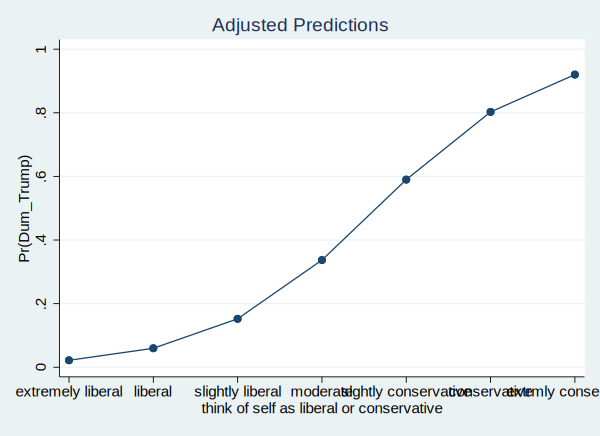

In [15]:
marginsplot, noci

## Jämförelse med vanlig regressionsanalys (OLS)

Den svängda formen på kurvan illustrerar det som är speciellt med den logistiska regressionen: den viker av nära "golvet" och "taket". Något sådant får vi inte till med en vanlig regressionsanalys.

För att se skillnaden kör jag i koden nedan två olika analyser, först en vanlig regressionsanalys, och sedan en logistisk. Slutligen gör jag en vanlig regressionsanalys med [dummyvariabler](dummy_sv.html) för varje värde av polviews - den kommer visa det faktiska medelvärdet i varje grupp, och är alltså "facit". För varje analys räknar jag ut förväntade värden med `margins` och gör sedan en graf, som sparas (med hjälp av option `name()`. Före alla kommandon har jag skrivit `quietly` för att inte själva outputen ska visas - det blir så otympligt här på sidan. Därefter visas båda graferna sida vid sida med hjälp av kommandot `graph combine`.

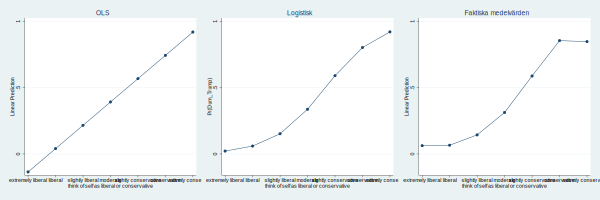

In [53]:
quietly reg dum_trump polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_ols, replace) noci title("OLS")

quietly logit dum_trump polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_logit, replace) noci title("Logistisk")

quietly reg dum_trump i.polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_mean, replace) noci title("Faktiska medelvärden")

graph combine m_ols m_logit m_mean, ycommon rows(1) xsize(12) ysize(4)

För det första ska konstateras att de två graferna till vänster är väldigt lika. Vi ser att ju mer höger respondenterna är, desto mer sannolikt att de röstade på Trump. Så ofta går det utmärkt att använda OLS för att svara på de substantiella frågorna. Koefficienterna är då också mycket lättare att tolka - de visar förändringen i sannolikhet för att man ska ha en etta på den beroende variabeln när man ökar den oberoende variabeln ett steg. I det här fallet blir den ungefär 0,18 - för varje steg åt höger man tar ökar sannolikheten att man ska rösta på Trump med 18 procentenheter.

Men det kan då också få konekvensen att vi hamnar under 0 eller över 1. Just det har hänt här. De som står längst till vänster beräknas ha -14 procents sannolikhet att rösta på Trump! I själva verket, ser vi längst till höger, var det faktiskt några av dem som stod längst vänster som gjorde det.

Den logistiska regressionsanalysen ligger alltså närmare verkligheten. Men! Den är också mycket svårare att förstå för de flesta. Rent pedagogiskt kan det därför i många fall finnas ett värde i att hålla det enkelt, och använda OLS även när den beroende variabeln bara har värdet 0 eller 1. Det kallas då "linear probability model".

## Logistisk regression med fler oberoende variabler

Precis som i vanlig regressionsanalys kan vi lägga till fler oberoende variabler, som kontrollvariabler erller ytterligare förklaringar eller vad det nu kan vara. Vi skriver dem då bara på en rad, ordningen spelar ingen roll (men den beroende variabeln ska alltid stå först). Här lägger vi till en variabel för kön, "sex", som kan ha värdet 1 (man) eller 2 (kvinna).

In [54]:
logit dum_trump polviews sex


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -670.94957  
Iteration 2:   log likelihood = -665.93439  
Iteration 3:   log likelihood = -665.91495  
Iteration 4:   log likelihood = -665.91495  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(2)        =     551.40
                                                Prob > chi2       =     0.0000
Log likelihood = -665.91495                     Pseudo R2         =     0.2928

------------------------------------------------------------------------------
   dum_trump |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   1.050731   .0585341    17.95   0.000     .9360062    1.165456
         sex |  -.5925794   .1363231    -4.35   0.000    -.8597678    -.325391
       _cons |  -3.975402   .3198097   -12.43   0.000    -4.6

Vi ser att den positiva effekten av att bli mer höger kvarstår även under kontroll för kön, och också att kvinnor (som har det högre värdet på variabeln sex) är mindre benägna att rösta på Trump.

Med hjälp av `margins` och `marginsplot` kan vi visa också hur det ser ut, grafiskt:




  Variables that uniquely identify margins: polviews sex


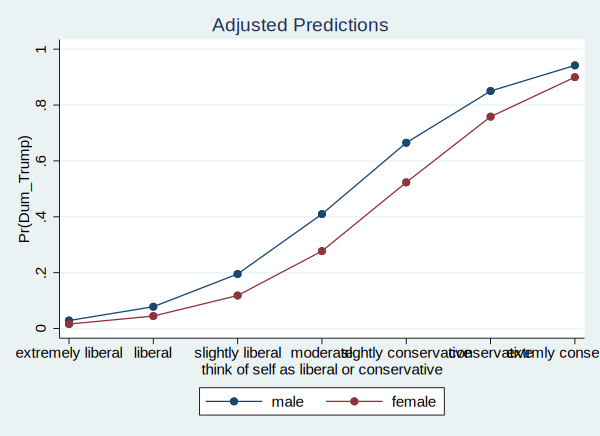

In [58]:
quietly margins, at(polviews = (1/7) sex=(1 2))
marginsplot, noci

**Här är det dock viktigt att vara på sin vakt.** När man ser grafen kan man få intrycket att det är större skillnad mellan könen i mitten på den ideologiska skalan. Och det är det också - men bara uttryckt i procentenheter. Den logistiska regressionen bygger på odds, som är relativa. Det vill säga, vi bör tänka mer i termer av om sannolikheter fördubblas eller halveras, snarare än om hur många procentenheter de ökar.

Även om skillnaden mellan män och kvinnor bland de som är "extremely liberal" ser obetydlig ut så är förhållandena i odds exakt densamma där, som i mitten på skalan. Vi bör därför inte göra någon teoretisk poäng av att könsgapet *ser* större ut i mitten. Det är bara en statistisk artefakt som följer av den logistiska regressionens natur. Om vi vill undersöka en sån hypotes bör vi använda en interaktionseffekt mellan kön och ideologi.

## Avslutning

Den logistiska regressionsanalysen är ett mer "korrekt" sätt att analysera när den beroende variabeln bara kan ha två värden, noll eller ett. Är man intresserad av att klassificera olika enheter eller räkna ut exakta sannolikheter kan den vara ett bra alternativ. Om man istället mer är intresserad av en översikt över sambandet mellan den beroende och de oberoende variablerna funkar OLS ofta nästan lika bra, med fördelen att den är enklare.